# Move Data to common folder

In [5]:
image_path = '../images_raw/rf3'
sample = 1000
output_path = '../mvd/images/'

In [6]:
# Randomply sample images from the image_path and copy them into output path
import os
import random
import shutil

files = os.listdir(image_path)
files = random.sample(files, sample)
for file in files:
    shutil.copy(os.path.join(image_path, file), output_path)

# Concatenate Annotations

In [24]:
mwitt = '../annotations/mwitt_annotations.csv'
mwitt_aug = '../annotations/augmented_annotations.csv'
sl = '../annotations/shark_locator.csv'
sl_aug = '../annotations/augmented_annotations_sl.csv'
rf1 = '../annotations/RF1.csv'
rf2 = '../annotations/RF2.csv'
rf3 = '../annotations/RF3.csv'
openimages1 = '../annotations/openimagesv7_train.csv'
openimages2 = '../annotations/openimagesv7_test.csv'
openimages3 = '../annotations/openimagesv7_val.csv'

annotations = [
  mwitt,
  mwitt_aug,
  sl,
  sl_aug,
  rf1,
  rf2,
  rf3,
  openimages1,
  openimages2,
  openimages3
]

In [23]:
import pandas as pd

In [17]:
# merge all annotations
combined_annotations = pd.DataFrame()

for annotation in annotations:
  df = pd.read_csv(annotation)
  print(f'For {annotation} columns: {sorted(df.columns)}')
  combined_annotations = pd.concat([combined_annotations, df])


For ../annotations/mwitt_annotations.csv columns: ['Augmentation', 'Family', 'Filename', 'Genus', 'Source', 'Species', 'xmax', 'xmin', 'ymax', 'ymin']
For ../annotations/augmented_annotations.csv columns: ['Augmentation', 'Family', 'Filename', 'Genus', 'Source', 'Species', 'xmax', 'xmin', 'ymax', 'ymin']
For ../annotations/shark_locator.csv columns: ['Augmentation', 'Family', 'Filename', 'Genus', 'Source', 'Species', 'xmax', 'xmin', 'ymax', 'ymin']
For ../annotations/augmented_annotations_sl.csv columns: ['Augmentation', 'Family', 'Filename', 'Genus', 'Source', 'Species', 'xmax', 'xmin', 'ymax', 'ymin']
For ../annotations/RF1.csv columns: ['Augmentation', 'Family', 'Filename', 'Genus', 'Source', 'Species', 'xmax', 'xmin', 'ymax', 'ymin']
For ../annotations/RF2.csv columns: ['Augmentation', 'Family', 'Filename', 'Genus', 'Source', 'Species', 'xmax', 'xmin', 'ymax', 'ymin']
For ../annotations/RF3.csv columns: ['Augmentation', 'Family', 'Filename', 'Genus', 'Source', 'Species', 'xmax', 'x

In [19]:
combined_annotations.to_csv('../annotations/combined_annotations.csv', index=False)

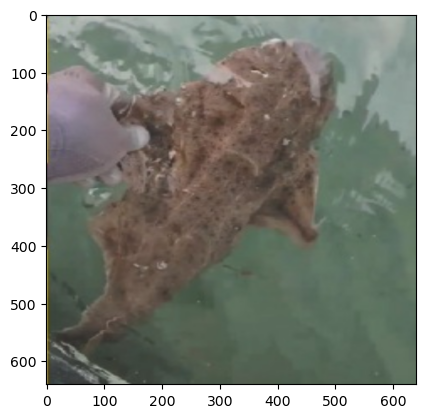

In [22]:
import cv2
import matplotlib.pyplot as plt

img = '../images_raw/jeremy/sl_07-05-18_SqSq_BigugliaCorse_LapinksiGiovos2019.jpg'

# Resize image to 640x640 and show it
img = cv2.imread(img)
img = cv2.resize(img, (640, 640))
# Convert the image from BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

# Clean

In [26]:
combined_annotations = pd.read_csv('../annotations/combined_annotations.csv')
combined_annotations.count()

Filename        12886
Family          12886
Genus            9373
Species          8675
ymin            12886
xmin            12886
xmax            12886
ymax            12886
Augmentation     1144
Source          12886
dtype: int64

In [28]:
source_prefix = {
  'SL': 'sl',
  'OpenImageV7': 'openimagev7',
  'RF1': '',
  'RF2': '',
  'RF3': '',
  'mwitt': '',
}

# Add the prefix to the Filename column of the files that have a source in the source_prefix dictionary
combined_annotations['Filename'] = combined_annotations.apply(lambda row: f'{source_prefix[row.Source]}_{row.Filename}', axis=1)

In [29]:
combined_annotations.to_csv('../annotations/combined_annotations.csv', index=False)